In [33]:
# Initialize Imports
import os
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import datetime as dt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Loading .env Environment Variable
load_dotenv()

True

## Collecting Top 10 Tech Companies' Investment Data Using Alpaca

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Set the tickers
tickers = ["FB", "AAPL", "MSFT", "GOOG", "AMZN", "IBM", "INTC", "NFLX", "ADBE", "CRM"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-11-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-11', tz='America/New_York').isoformat()

In [12]:
# Get 5 years' worth of historical data for Tech Companies
tech_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

tech_stock_data.index = tech_stock_data.index.date

# Display historical data
tech_stock_data

AAPL                                            ADBE          \
              open    high       low    close     volume      open    high   
2015-11-11  116.37  117.42  115.2100  116.110   41313334   90.6800   91.47   
2015-11-12  116.26  116.82  115.6500  115.740   28449600   91.0800   91.88   
2015-11-13  115.20  115.57  112.2700  112.330   40048909   90.9500   90.95   
2015-11-16  111.38  114.24  111.0000  114.180   32151889   89.6600   89.80   
2015-11-17  114.92  115.05  113.3200  113.670   24140379   89.9500   91.29   
...            ...     ...       ...      ...        ...       ...     ...   
2020-11-05  117.99  119.62  116.8686  118.990  107993032  500.0000  502.53   
2020-11-06  118.32  119.20  116.1300  118.685   99225280  494.9500  498.72   
2020-11-09  120.50  121.99  116.0500  116.320  129352953  494.6963  499.41   
2020-11-10  115.55  117.59  114.1300  115.970  114408580  466.7200  468.01   
2020-11-11  117.19  119.63  116.4400  119.510  101073157  459.9344  470.12   

                                      ...     MSFT                            \
                low   close   volume  ...     open      high     low   close   
2015-11-11   90.250   91.19  1846724  ...   53.700   54.2000   53.46   53.65   
2015-11-12   90.740   90.85  1878488  ...   53.480   53.9791   53.19   53.32   
2015-11-13   88.795   89.02  1419104  ...   53.070   53.2900   52.53   52.84   
2015-11-16   88.000   89.77  1731060  ...   53.050   53.8900   52.85   53.76   
2015-11-17   89.870   90.29  1282071  ...   53.170   53.5300   52.85   52.97   
...             ...     ...      ...  ...      ...       ...     ...     ...   
2020-11-05  489.800  496.46  1764575  ...  221.900  224.1100  221.15  223.29   
2020-11-06  483.000  494.64  1552782  ...  222.260  224.3200  218.03  223.62   
2020-11-09  470.760  470.84  2672554  ...  224.435  228.1200  217.88  218.34   
2020-11-10  446.000  452.13  3830570  ...  214.500  216.5000  209.72  211.02   
2020-11-11  457.500  467.75  2160578  ...  212.540  218.0400  212.20  216.40   

                        NFLX                                      
              volume    open      high     low   close    volume  
2015-11-11  30924665  113.08  114.6100  111.41  112.86  10019958  
2015-11-12  29445275  112.52  115.2500  108.20  108.90  15565499  
2015-11-13  31682644  108.22  109.0700  103.27  103.63  16844766  
2015-11-16  25893094  102.97  111.6500  101.86  111.37  17657921  
2015-11-17  24922877  111.97  118.7900  111.70  117.15  30537120  
...              ...     ...       ...     ...     ...       ...  
2020-11-05  28617137  506.56  518.7337  503.45  513.65   4625973  
2020-11-06  20598219  515.00  515.2100  502.51  514.86   3357746  
2020-11-09  31345985  485.54  495.8500  467.26  470.79   8851467  
2020-11-10  37784540  470.95  484.6000  463.41  480.26   7336817  
2020-11-11  24660239  483.00  491.6600  478.26  490.76   4467737  

[1260 rows x 50 columns]

## Tech Portfolio Investment Analyis & Visualizations

In [59]:
# Pick close prices
aapl_close_price = tech_stock_data["AAPL"]
aapl_close_price.drop(columns=["open","high","low","volume"],inplace=True)
aapl_close_price.rename(columns={"close":"AAPL Close"},inplace=True)

amzn_close_price = tech_stock_data["AMZN"]
amzn_close_price.drop(columns=["open","high","low","volume"],inplace=True)
amzn_close_price.rename(columns={"close":"AMZN Close"},inplace=True)

fb_close_price = tech_stock_data["FB"]
fb_close_price.drop(columns=["open","high","low","volume"],inplace=True)
fb_close_price.rename(columns={"close":"FB Close"},inplace=True)

msft_close_price = tech_stock_data["MSFT"]
msft_close_price.drop(columns=["open","high","low","volume"],inplace=True)
msft_close_price.rename(columns={"close":"MSFT Close"},inplace=True)

goog_close_price = tech_stock_data["GOOG"]
goog_close_price.drop(columns=["open","high","low","volume"],inplace=True)
goog_close_price.rename(columns={"close":"GOOG Close"},inplace=True)

ibm_close_price = tech_stock_data["IBM"]
ibm_close_price.drop(columns=["open","high","low","volume"],inplace=True)
ibm_close_price.rename(columns={"close":"IBM Close"},inplace=True)

intc_close_price = tech_stock_data["INTC"]
intc_close_price.drop(columns=["open","high","low","volume"],inplace=True)
intc_close_price.rename(columns={"close":"INTC Close"},inplace=True)

nflx_close_price = tech_stock_data["NFLX"]
nflx_close_price.drop(columns=["open","high","low","volume"],inplace=True)
nflx_close_price.rename(columns={"close":"NFLX Close"},inplace=True)

adbe_close_price = tech_stock_data["ADBE"]
adbe_close_price.drop(columns=["open","high","low","volume"],inplace=True)
adbe_close_price.rename(columns={"close":"ADBE Close"},inplace=True)

crm_close_price = tech_stock_data["CRM"]
crm_close_price.drop(columns=["open","high","low","volume"],inplace=True)
crm_close_price.rename(columns={"close":"CRM Close"},inplace=True)

# Concatenate all close prices
tech_combined_stock=pd.concat([aapl_close_price, amzn_close_price,fb_close_price,msft_close_price,goog_close_price,ibm_close_price,intc_close_price,nflx_close_price,adbe_close_price,crm_close_price],axis="columns", join="inner")

## Performance 

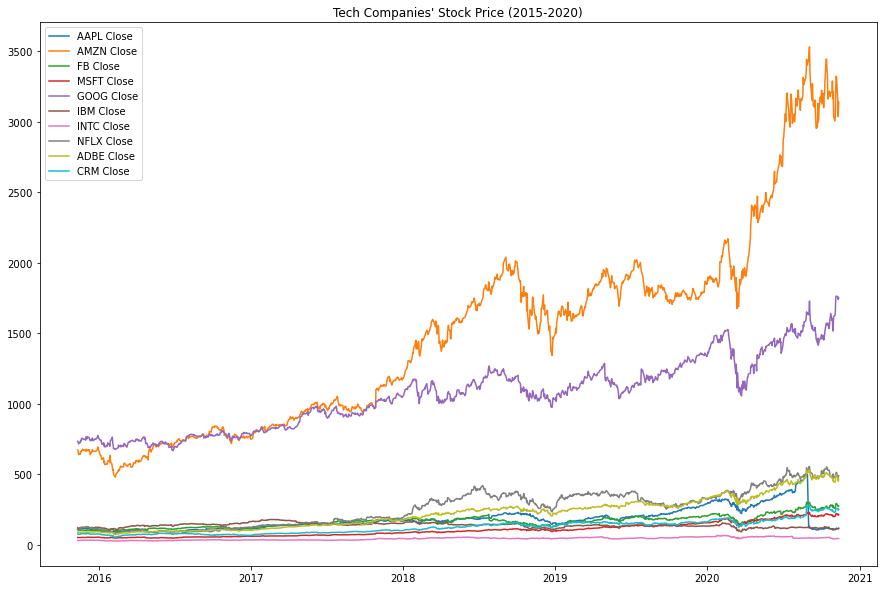

In [29]:
# Line Plot Close Prices 
tech_combined_stock.plot(figsize=(15, 10),title= "Tech Companies' Stock Price (2015-2020)")

In [60]:
# Calc daily returns for single dataframe
tech_returns=tech_combined_stock.pct_change()


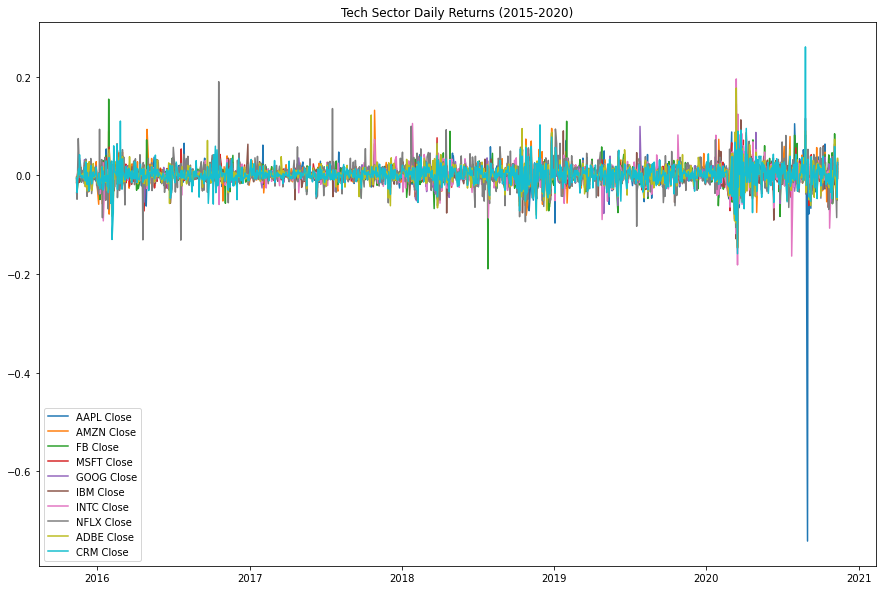

In [21]:
# Plot Daily Returns
ax = tech_returns
tech_returns.plot(legend=True, figsize=(15,10), title = "Tech Sector Daily Returns (2015-2020)")

In [61]:
# Calc percentage change for tech companies
pct_change = tech_combined_stock.pct_change()


In [62]:
# Calc percent change correlation for tech companies
pct_change_correlation = pct_change.corr()


Text(0.5, 1.0, 'Heatmap of Percent Change Correlation')

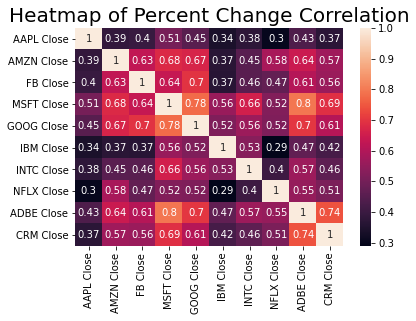

In [35]:
# Heatmap of Percent Change correlation
sns.heatmap(pct_change_correlation, annot=True)
plt.title('Heatmap of Percent Change Correlation', fontsize = 20)

In [63]:
# Construct a correlation table
correlation = tech_combined_stock.corr()

Text(0.5, 1.0, 'Heatmap of Price Correlation')

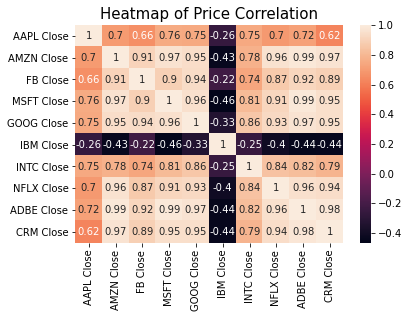

In [46]:
# Heatmap of price correlation
sns.heatmap(correlation, annot=True)
plt.title('Heatmap of Price Correlation', fontsize = 15)

## Risk 

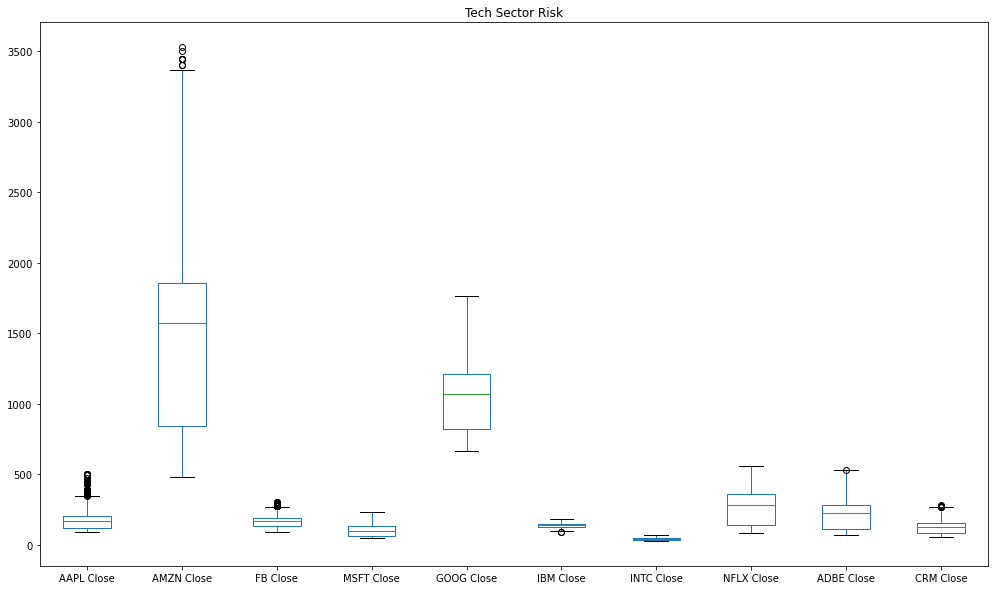

In [37]:
# Box plot to visually show risk
tech_combined_stock.plot.box(figsize=(17,10), legend=True, title = "Tech Sector Risk")

In [38]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = tech_combined_stock.std()
daily_std

AAPL Close     75.957100
AMZN Close    708.469752
FB Close       42.033403
MSFT Close     48.062197
GOOG Close    249.660928
IBM Close      15.533139
INTC Close      9.483377
NFLX Close    126.667642
ADBE Close    111.254651
CRM Close      46.605782
dtype: float64

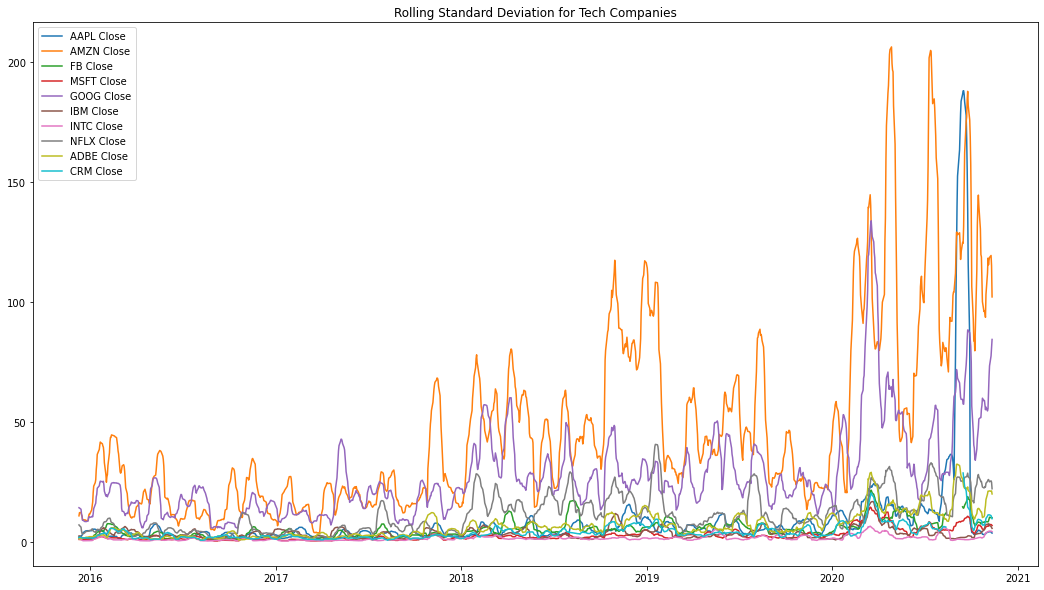

In [52]:
# Plot the rolling standard deviation
tech_combined_stock.rolling(window=21).std().plot(figsize=(18,10), title= "Rolling Standard Deviation for Tech Companies")

## Future Outlook (Monte Carlo Simulation)

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stocks = MCSimulation(
    portfolio_data = tech_stock_data,
    num_simulation = 750,
    num_trading_days = 252*30
)

In [55]:
mc_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998760,1.007204,1.000730,0.995379,1.005325,1.007479,1.008520,1.005908,0.999827,1.010030,...,0.994702,1.004245,1.003108,1.004762,1.000349,1.001991,0.987158,1.000818,0.999736,1.009034
2,1.000500,1.005493,1.001756,0.996779,0.998885,1.013803,1.006343,1.010007,1.014230,1.009706,...,0.999536,1.003284,1.009567,1.012760,1.011508,1.008063,0.987797,1.002218,1.007070,1.011834
3,0.998368,1.012331,1.010452,0.998077,0.996425,1.015127,1.013380,1.019595,1.014153,1.011223,...,1.001138,1.002955,0.999441,1.011282,1.015179,1.009746,0.981312,0.998068,1.010317,1.011055
4,0.993502,1.009586,1.004072,1.009787,1.005535,1.019771,1.009444,1.023643,1.008615,1.005299,...,1.011183,0.995685,1.002345,1.015435,1.008409,1.018721,0.987490,1.007981,1.009754,1.018963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2721.514291,1355.500613,1083.857778,2162.128550,483.295340,1902.534207,1883.362612,726.389654,1002.951584,2932.024806,...,1002.927297,1189.417015,3211.801192,883.758499,1236.231875,951.940993,1077.143656,1741.235803,3687.084509,963.636348
7557,2720.951395,1356.953401,1077.061340,2182.880109,481.307370,1894.641227,1877.886401,728.241615,1003.608666,2905.648084,...,1006.900332,1206.910097,3239.210496,884.555156,1228.879797,961.037063,1080.924634,1736.791157,3742.568906,968.351204
7558,2695.476444,1364.678484,1067.915627,2187.345701,482.471201,1886.825008,1878.718279,735.492055,1015.872685,2899.112387,...,1010.939290,1204.772450,3214.495153,878.876145,1230.662260,959.243770,1092.095821,1733.138074,3679.530484,966.554108
7559,2688.431368,1363.708250,1075.540976,2158.793973,477.512214,1885.222602,1883.523084,742.786186,1017.154787,2898.848041,...,1017.963807,1204.546250,3247.456083,869.257364,1226.651338,963.976733,1098.091549,1748.336507,3666.280235,970.847711


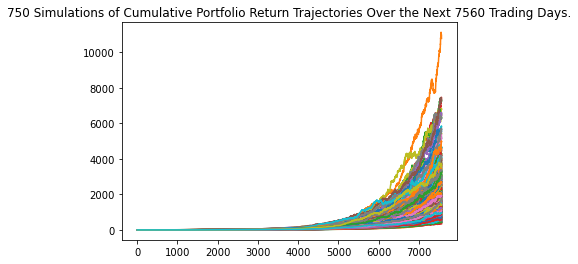

In [56]:
# Plot simulation outcomes
line_plot = mc_stocks.plot_simulation()

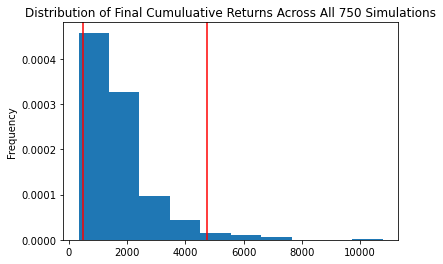

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = mc_stocks.plot_distribution()